In [9]:
import pandas as pd
from utils import make_plot, rmse  

In [10]:
# log_file_path = 'optim_wardi_test.log'
# log_file_path = 'regular_wardi_test.log'
log_file_path = 'loggyy.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,ctrl_callback_time,metadata
0,9.536743e-07,0.015693,-0.017725,-0.048225,0.022963,0.704241,-0.018186,-1.480673,-0.008611,4.0,0.0,-0.5,0.0,0.194055,0.195072,0.196230,Sim
1,1.964278e-01,0.015693,-0.017725,-0.048225,0.022963,0.759454,-0.015267,-1.276471,-0.014639,4.0,0.0,-0.5,0.0,0.000931,0.001138,0.001595,jax_pred_jac_only
2,1.996360e-01,0.016150,-0.016845,-0.050291,0.023212,0.796261,-0.013658,-1.133530,-0.018952,4.0,0.0,-0.5,0.0,0.000741,0.000932,0.001271,1x Speed
3,2.097220e-01,0.016312,-0.016817,-0.050706,0.023201,0.821097,-0.011883,-1.033471,-0.021967,4.0,0.0,-0.5,0.0,0.000845,0.001055,0.001554,QuatYawError
4,2.198207e-01,0.016372,-0.016810,-0.050854,0.023204,0.837951,-0.010214,-0.963430,-0.024078,4.0,0.0,-0.5,0.0,0.000862,0.001065,0.001514,0


In [11]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"Speed: {df_log['metadata'][2]}")
print(f"(Valid for Nonlin & Jax predictor only) Predictor was: {df_log['metadata'][3]}")
print(f"For yaw error we used: {df_log['metadata'][4]}")
print(f"{df_log['metadata'][5]}")
print(f"Mean NR computation time: {df_log['nr_time'].mean()}")
print(f"Mean NR computation freq: {1/df_log['nr_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: jax_pred_jac_only
Speed: 1x Speed
(Valid for Nonlin & Jax predictor only) Predictor was: QuatYawError
For yaw error we used: 0
0
Mean NR computation time: 0.0017028319082040408
Mean NR computation freq: 587.2570247140187
Mean callback time: 0.002460656409290967
RMSE: 0.6166630703864153


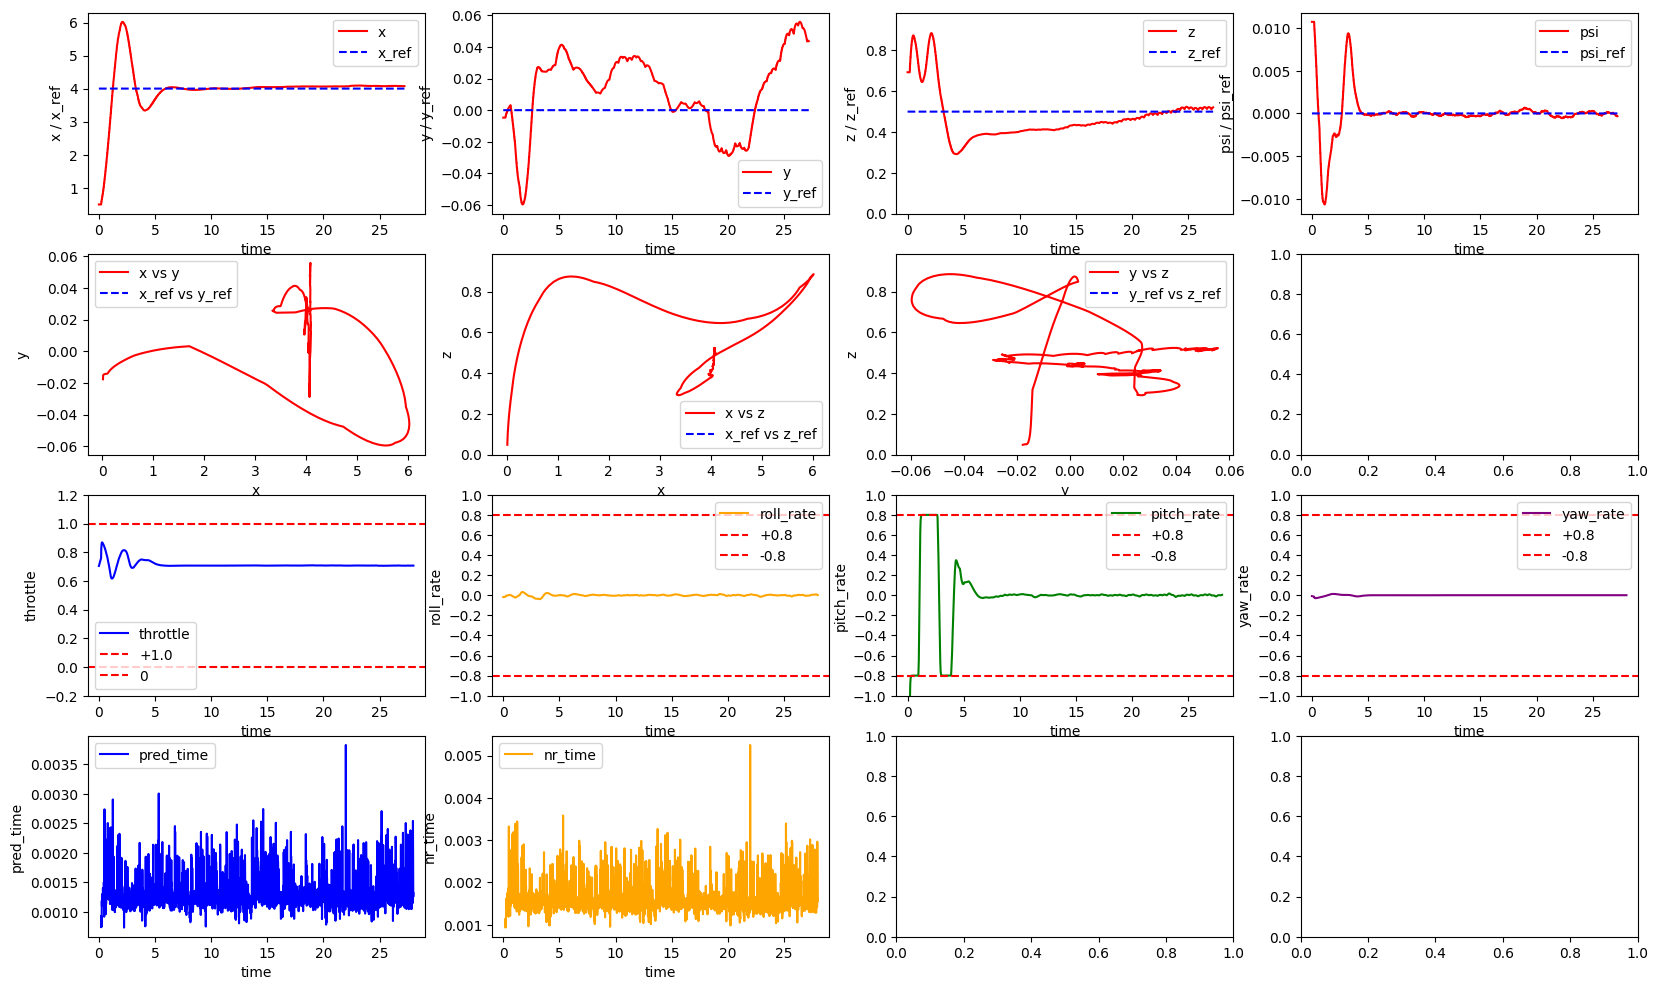

In [12]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)